# **Heart disease prediction and analysis**

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

### Load and Explore Dataset

In [4]:
df = pd.read_csv('heart.csv')
df
print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (1061, 12)

Column Names: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']

First 5 rows:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Dataset Information

In [6]:
print("Dataset Info:")
df.info()

print("\nMissing Values:")
df.isnull().sum()

print("\nBasic Statistics:")
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             1061 non-null   int64  
 1   Sex             1061 non-null   object 
 2   ChestPainType   1061 non-null   object 
 3   RestingBP       1061 non-null   int64  
 4   Cholesterol     1061 non-null   int64  
 5   FastingBS       1061 non-null   int64  
 6   RestingECG      1061 non-null   object 
 7   MaxHR           1061 non-null   int64  
 8   ExerciseAngina  1061 non-null   object 
 9   Oldpeak         1061 non-null   float64
 10  ST_Slope        1061 non-null   object 
 11  HeartDisease    1061 non-null   int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 99.6+ KB

Missing Values:

Basic Statistics:


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000,1061.000000
mean,53.691800,132.421301,202.864279,0.221489,137.774741,0.900848,0.555137
std,9.365846,18.072879,105.159468,0.415445,25.285412,1.097961,0.497185
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,177.000000,0.000000,120.000000,0.000000,0.000000
50%,55.000000,130.000000,222.000000,0.000000,140.000000,0.500000,1.000000
75%,60.000000,140.000000,265.000000,0.000000,157.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Check Unique Values in Categorical Columns

In [7]:
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

for column in categorical_columns:
    print(f"\n{column} unique values:")
    print(df[column].value_counts())


Sex unique values:
Sex
M    824
F    237
Name: count, dtype: int64

ChestPainType unique values:
ChestPainType
ASY    567
NAP    230
ATA    212
TA      52
Name: count, dtype: int64

RestingECG unique values:
RestingECG
Normal    640
LVH       226
ST        195
Name: count, dtype: int64

ExerciseAngina unique values:
ExerciseAngina
N    645
Y    416
Name: count, dtype: int64

ST_Slope unique values:
ST_Slope
Flat    536
Up      448
Down     77
Name: count, dtype: int64


### Label Encoding - Setup

In [8]:
# Create a copy of the dataset for processing
df_encoded = df.copy()

# Initialize label encoders
label_encoders = {}

### Label Encoding

In [9]:
# Apply label encoding to categorical columns
for column in categorical_columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le

    # Print encoding mapping
    print(f"\n{column} encoding:")
    for i, label in enumerate(le.classes_):
        print(f"  {label} -> {i}")


Sex encoding:
  F -> 0
  M -> 1

ChestPainType encoding:
  ASY -> 0
  ATA -> 1
  NAP -> 2
  TA -> 3

RestingECG encoding:
  LVH -> 0
  Normal -> 1
  ST -> 2

ExerciseAngina encoding:
  N -> 0
  Y -> 1

ST_Slope encoding:
  Down -> 0
  Flat -> 1
  Up -> 2


### Display Encoded Dataset

In [13]:
print("Dataset after label encoding:")
df_encoded.head()

Dataset after label encoding:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [12]:
print("\nDataset Info after encoding:")
print(df_encoded.info())

Dataset after label encoding:

Dataset Info after encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             1061 non-null   int64  
 1   Sex             1061 non-null   int64  
 2   ChestPainType   1061 non-null   int64  
 3   RestingBP       1061 non-null   int64  
 4   Cholesterol     1061 non-null   int64  
 5   FastingBS       1061 non-null   int64  
 6   RestingECG      1061 non-null   int64  
 7   MaxHR           1061 non-null   int64  
 8   ExerciseAngina  1061 non-null   int64  
 9   Oldpeak         1061 non-null   float64
 10  ST_Slope        1061 non-null   int64  
 11  HeartDisease    1061 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 99.6 KB
None


### Target Variable Distribution

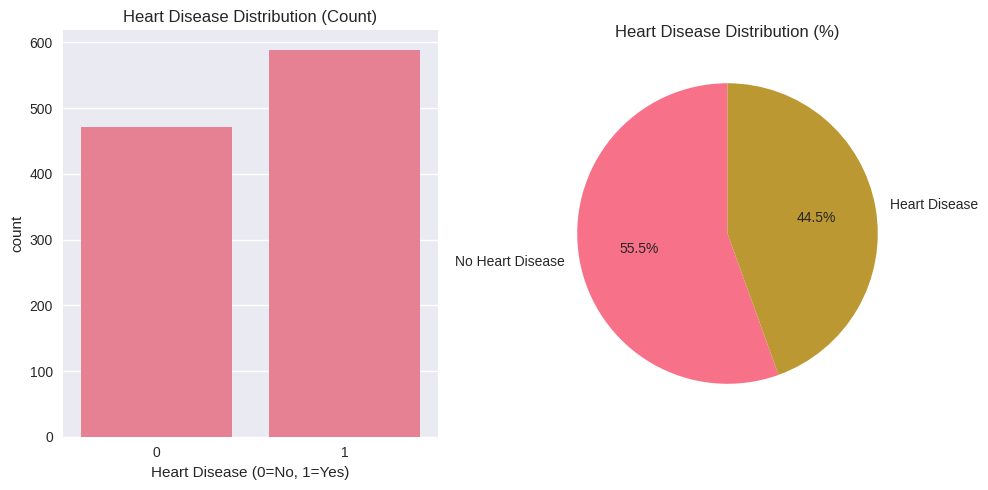

In [14]:
plt.figure(figsize=(10, 5))

# Subplot 1: Count plot
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='HeartDisease')
plt.title('Heart Disease Distribution (Count)')
plt.xlabel('Heart Disease (0=No, 1=Yes)')

# Subplot 2: Pie chart
plt.subplot(1, 2, 2)
target_counts = df['HeartDisease'].value_counts()
plt.pie(target_counts.values, labels=['No Heart Disease', 'Heart Disease'],
        autopct='%1.1f%%', startangle=90)
plt.title('Heart Disease Distribution (%)')

plt.tight_layout()
plt.show()

### Age Analysis

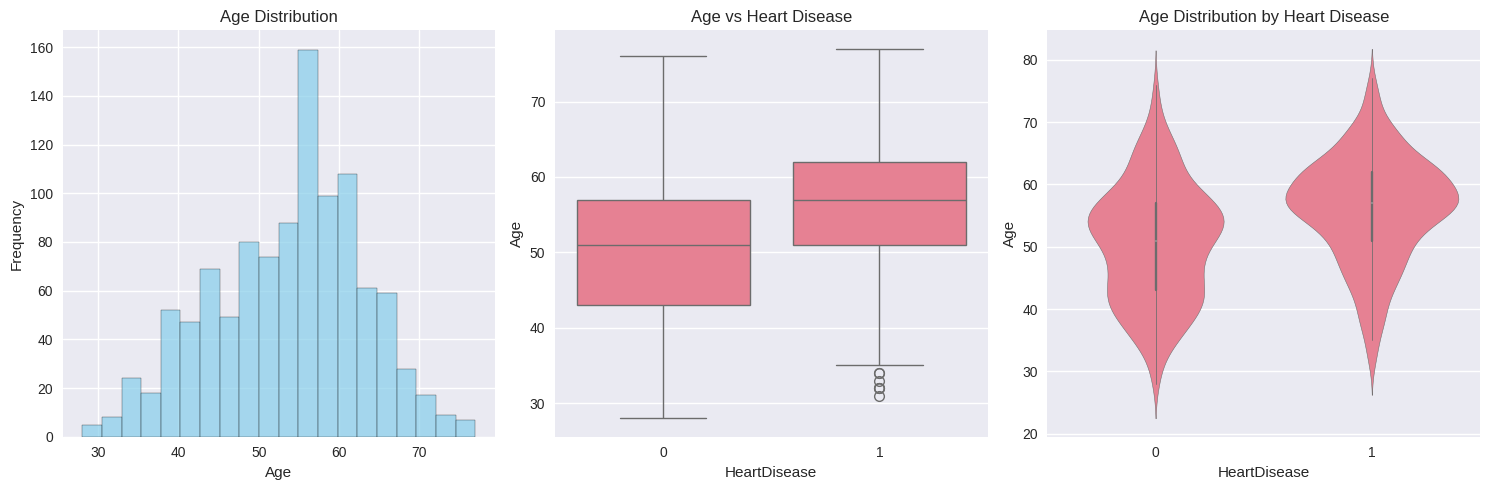

In [15]:
plt.figure(figsize=(15, 5))

# Age distribution
plt.subplot(1, 3, 1)
plt.hist(df['Age'], bins=20, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Age vs Heart Disease (Box plot)
plt.subplot(1, 3, 2)
sns.boxplot(data=df, x='HeartDisease', y='Age')
plt.title('Age vs Heart Disease')

# Age vs Heart Disease (Violin plot)
plt.subplot(1, 3, 3)
sns.violinplot(data=df, x='HeartDisease', y='Age')
plt.title('Age Distribution by Heart Disease')

plt.tight_layout()
plt.show()

### Categorical Variables Analysis

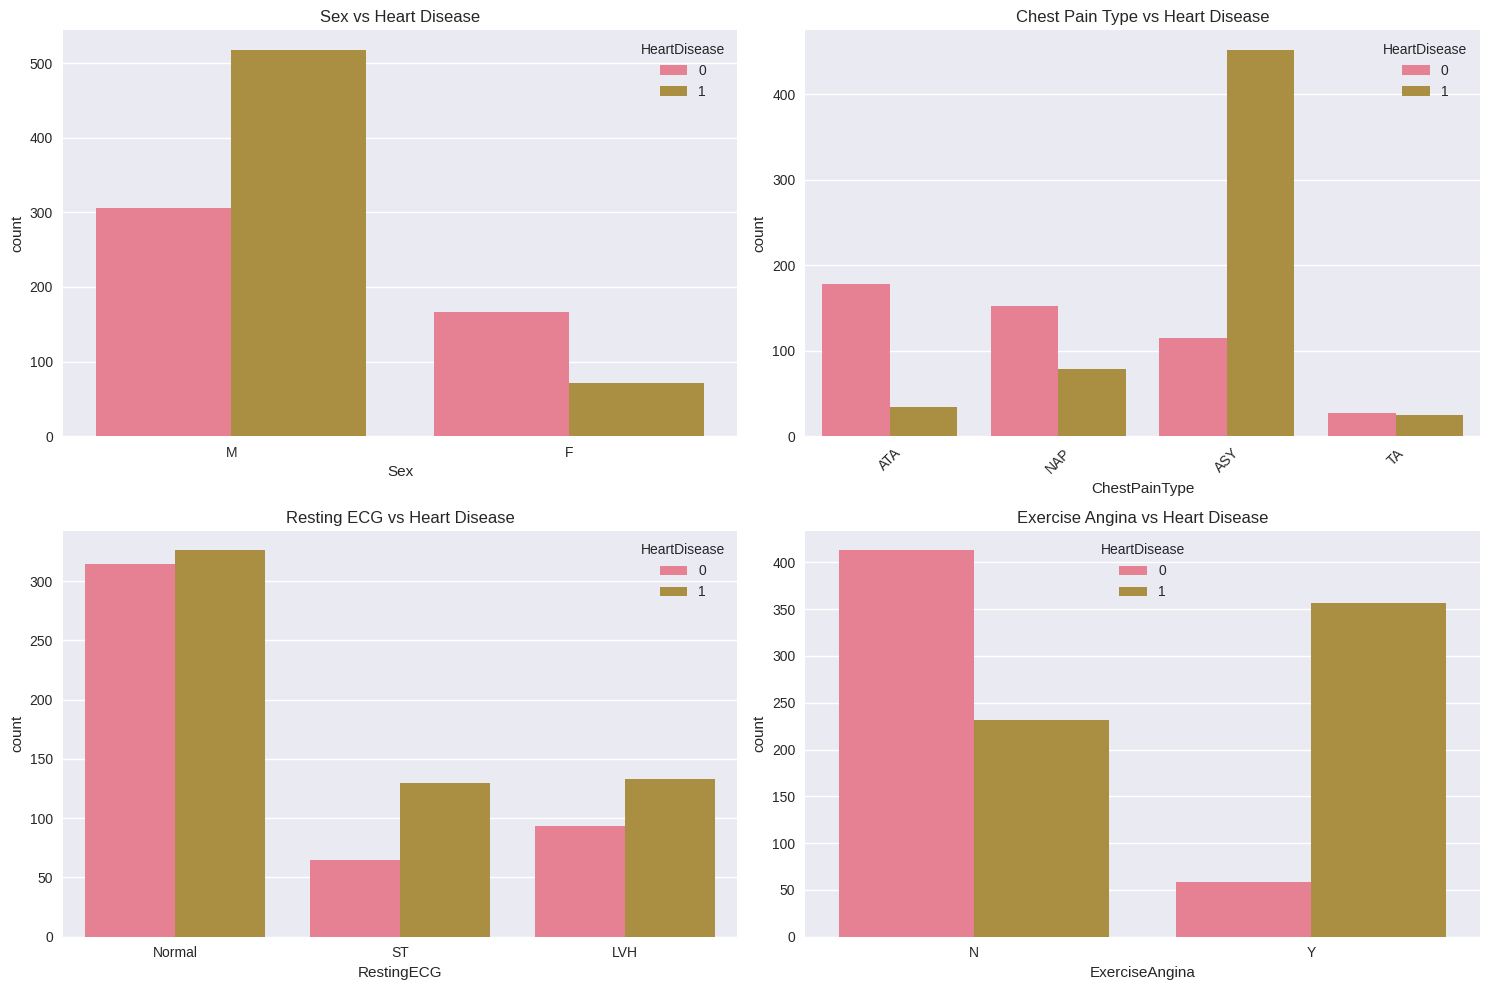

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Sex analysis
sns.countplot(data=df, x='Sex', hue='HeartDisease', ax=axes[0, 0])
axes[0, 0].set_title('Sex vs Heart Disease')

# ChestPainType analysis
sns.countplot(data=df, x='ChestPainType', hue='HeartDisease', ax=axes[0, 1])
axes[0, 1].set_title('Chest Pain Type vs Heart Disease')
axes[0, 1].tick_params(axis='x', rotation=45)

# RestingECG analysis
sns.countplot(data=df, x='RestingECG', hue='HeartDisease', ax=axes[1, 0])
axes[1, 0].set_title('Resting ECG vs Heart Disease')

# ExerciseAngina analysis
sns.countplot(data=df, x='ExerciseAngina', hue='HeartDisease', ax=axes[1, 1])
axes[1, 1].set_title('Exercise Angina vs Heart Disease')

plt.tight_layout()
plt.show()

### Categorical Variables Analysis

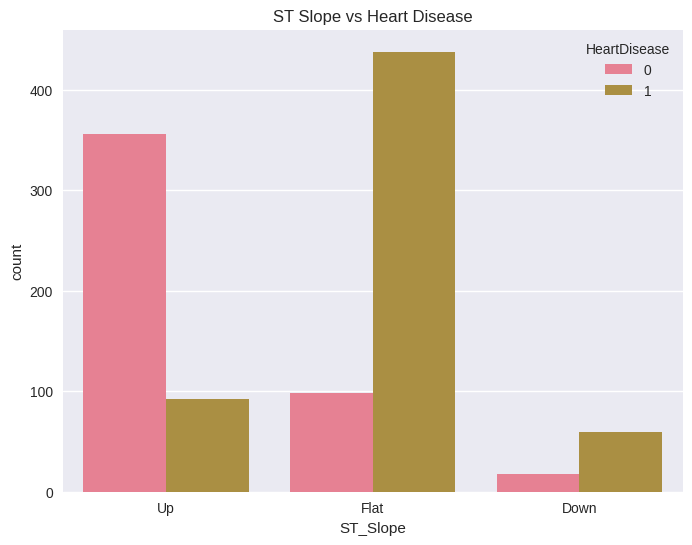

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='ST_Slope', hue='HeartDisease')
plt.title('ST Slope vs Heart Disease')
plt.show()

### Continuous Variables Analysis

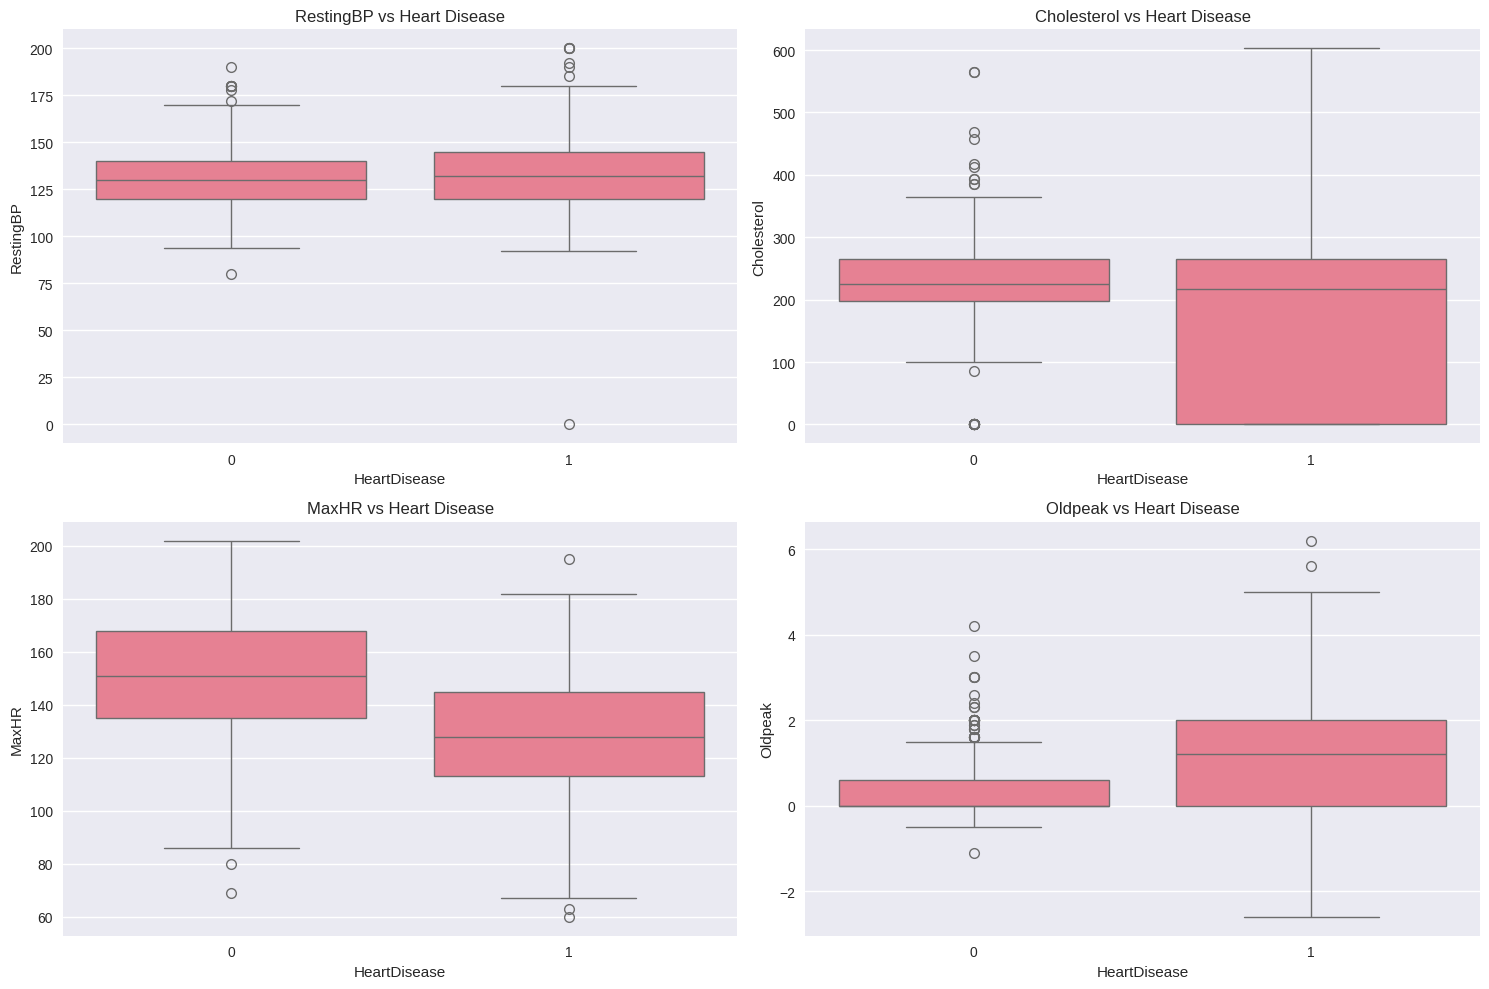

In [18]:
continuous_cols = ['RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, col in enumerate(continuous_cols):
    row = i // 2
    col_idx = i % 2

    sns.boxplot(data=df, x='HeartDisease', y=col, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'{col} vs Heart Disease')

plt.tight_layout()
plt.show()

### Distribution of Continuous Variables

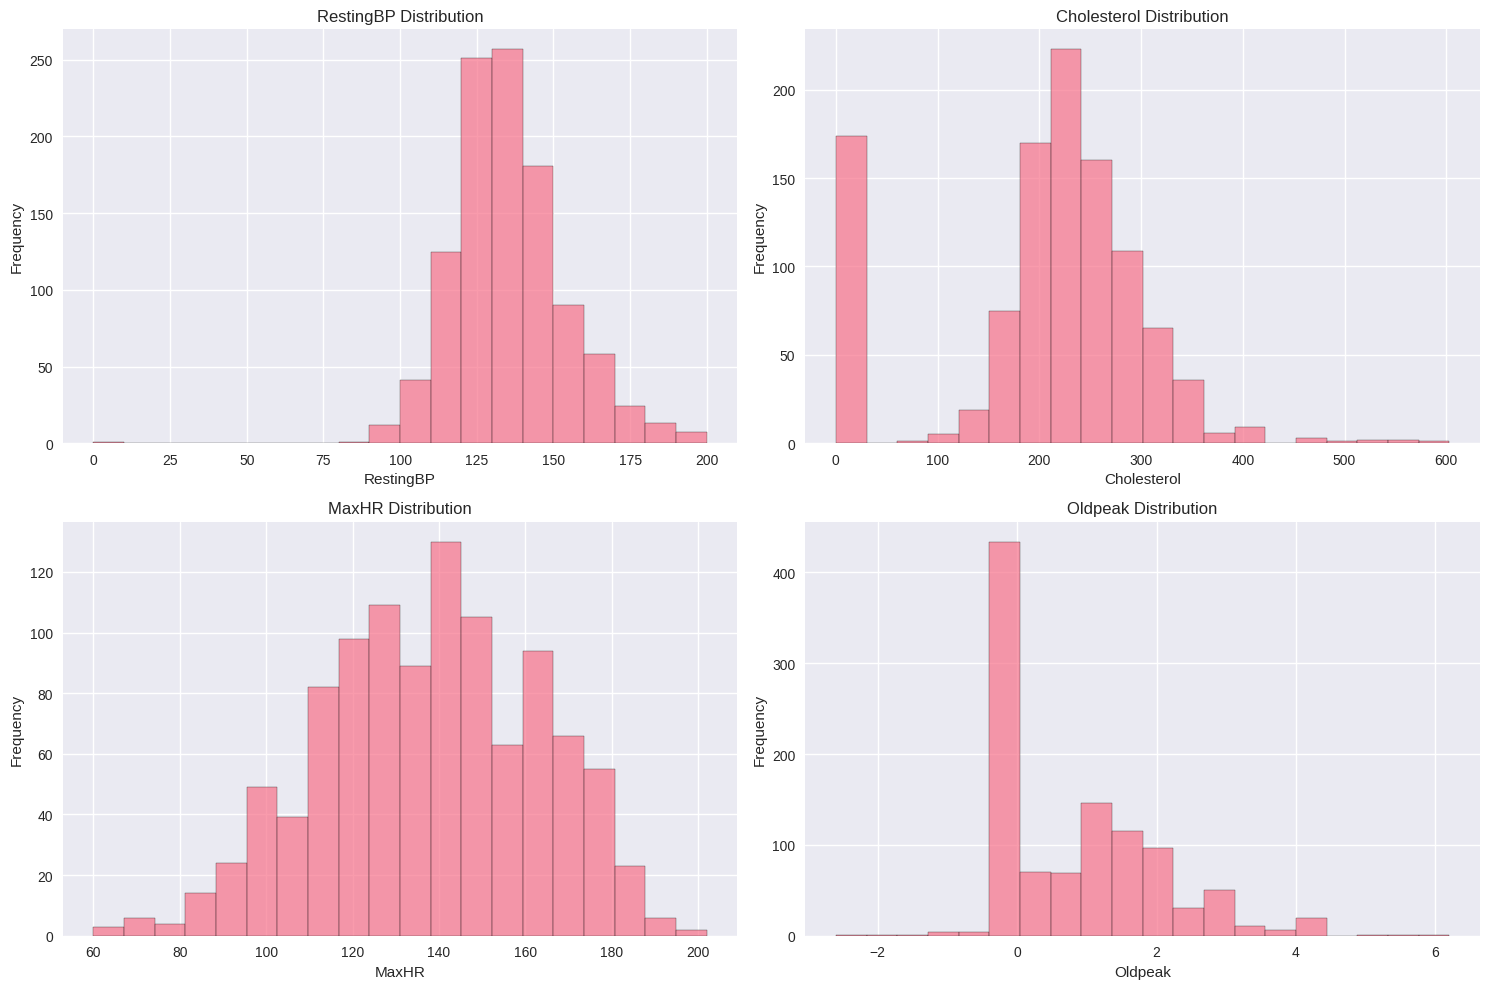

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, col in enumerate(continuous_cols):
    row = i // 2
    col_idx = i % 2

    axes[row, col_idx].hist(df[col], bins=20, alpha=0.7, edgecolor='black')
    axes[row, col_idx].set_title(f'{col} Distribution')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


### Correlation Heatmap

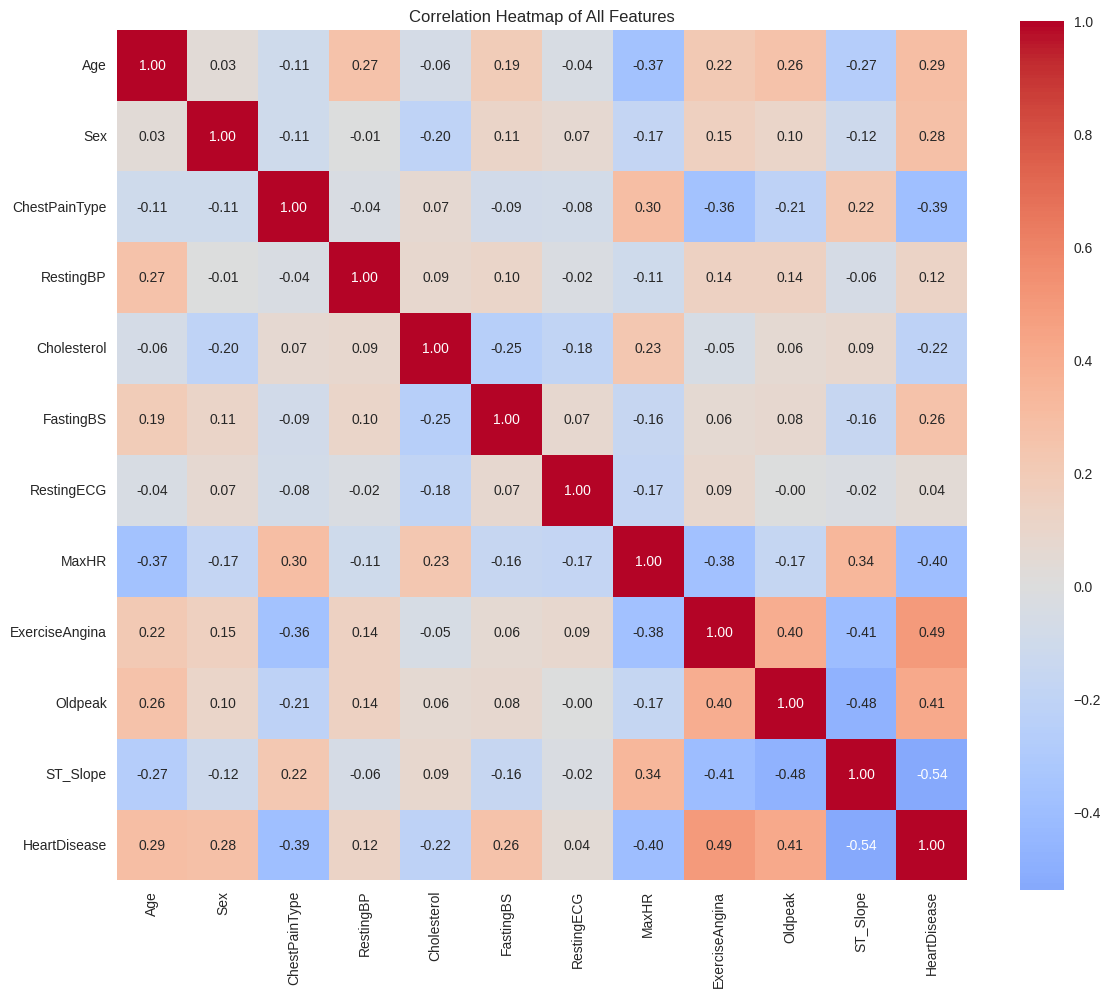

In [20]:
plt.figure(figsize=(12, 10))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f')
plt.title('Correlation Heatmap of All Features')
plt.tight_layout()
plt.show()

### Feature Correlation with Target

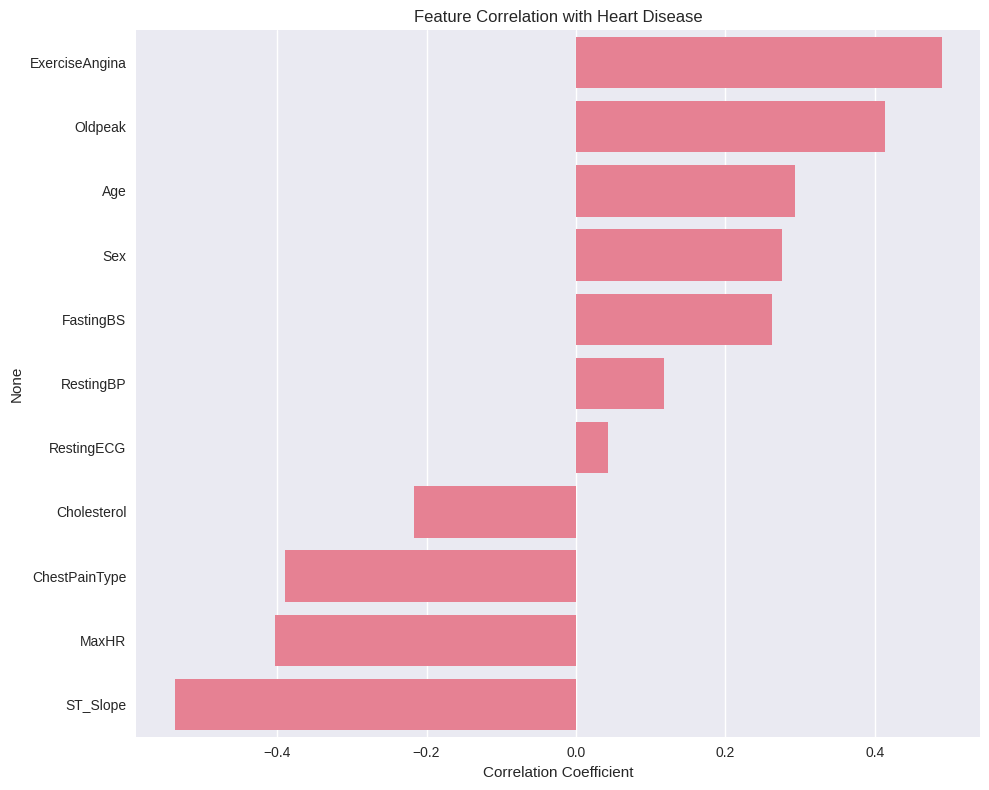

Features most correlated with Heart Disease:
ExerciseAngina    0.489721
Oldpeak           0.414418
Age               0.293870
Sex               0.275796
FastingBS         0.262818
RestingBP         0.118204
RestingECG        0.042828
Cholesterol      -0.216599
ChestPainType    -0.389363
MaxHR            -0.403076
ST_Slope         -0.537422
Name: HeartDisease, dtype: float64


In [21]:
plt.figure(figsize=(10, 8))
target_corr = df_encoded.corr()['HeartDisease'].sort_values(ascending=False)
target_corr = target_corr.drop('HeartDisease')  # Remove self-correlation

sns.barplot(x=target_corr.values, y=target_corr.index)
plt.title('Feature Correlation with Heart Disease')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

print("Features most correlated with Heart Disease:")
print(target_corr)

### Data Preparation for Machine Learning

In [22]:
# Prepare features (X) and target (y)
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

print("Feature columns:", X.columns.tolist())
print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nTarget distribution:")
print(y.value_counts())


Feature columns: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']
Features shape: (1061, 11)
Target shape: (1061,)

Target distribution:
HeartDisease
1    589
0    472
Name: count, dtype: int64


### Train-Test Split

In [23]:
# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"\nTraining set target distribution:")
print(y_train.value_counts())
print(f"\nTesting set target distribution:")
print(y_test.value_counts())

Training set size: 848 samples
Testing set size: 213 samples

Training set target distribution:
HeartDisease
1    471
0    377
Name: count, dtype: int64

Testing set target distribution:
HeartDisease
1    118
0     95
Name: count, dtype: int64


### Initialize Machine Learning Models

In [25]:

models = {
    'Linear Regression': LinearRegression(),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(random_state=42)
}

print("Models to be trained:")
for name in models.keys():
    print(f"- {name}")

Models to be trained:
- Linear Regression
- Logistic Regression
- Decision Tree
- Random Forest
- Naive Bayes
- SVM


### Train and Evaluate Models

In [26]:
# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"Training {name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    if name == 'Linear Regression':
        # For linear regression, convert continuous predictions to binary
        y_pred_continuous = model.predict(X_test)
        y_pred = (y_pred_continuous > 0.5).astype(int)
    else:
        y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store results
    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Model': model,
        'Predictions': y_pred
    }

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")


Training Linear Regression...
Accuracy: 0.8545
Precision: 0.8655
Recall: 0.8729
F1-Score: 0.8692

Training Logistic Regression...
Accuracy: 0.8451
Precision: 0.8455
Recall: 0.8814
F1-Score: 0.8631

Training Decision Tree...
Accuracy: 0.8357
Precision: 0.8547
Recall: 0.8475
F1-Score: 0.8511

Training Random Forest...
Accuracy: 0.9061
Precision: 0.9016
Recall: 0.9322
F1-Score: 0.9167

Training Naive Bayes...
Accuracy: 0.8498
Precision: 0.8772
Recall: 0.8475
F1-Score: 0.8621

Training SVM...
Accuracy: 0.7136
Precision: 0.7436
Recall: 0.7373
F1-Score: 0.7404


### Model Performance Comparison Table

In [27]:
# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[model]['Accuracy'] for model in results.keys()],
    'Precision': [results[model]['Precision'] for model in results.keys()],
    'Recall': [results[model]['Recall'] for model in results.keys()],
    'F1-Score': [results[model]['F1-Score'] for model in results.keys()]
})

print("MODEL PERFORMANCE COMPARISON")
print("="*60)
print(comparison_df.to_string(index=False, float_format='%.4f'))

MODEL PERFORMANCE COMPARISON
              Model  Accuracy  Precision  Recall  F1-Score
  Linear Regression    0.8545     0.8655  0.8729    0.8692
Logistic Regression    0.8451     0.8455  0.8814    0.8631
      Decision Tree    0.8357     0.8547  0.8475    0.8511
      Random Forest    0.9061     0.9016  0.9322    0.9167
        Naive Bayes    0.8498     0.8772  0.8475    0.8621
                SVM    0.7136     0.7436  0.7373    0.7404


### Model Performance Visualization - Individual Metrics

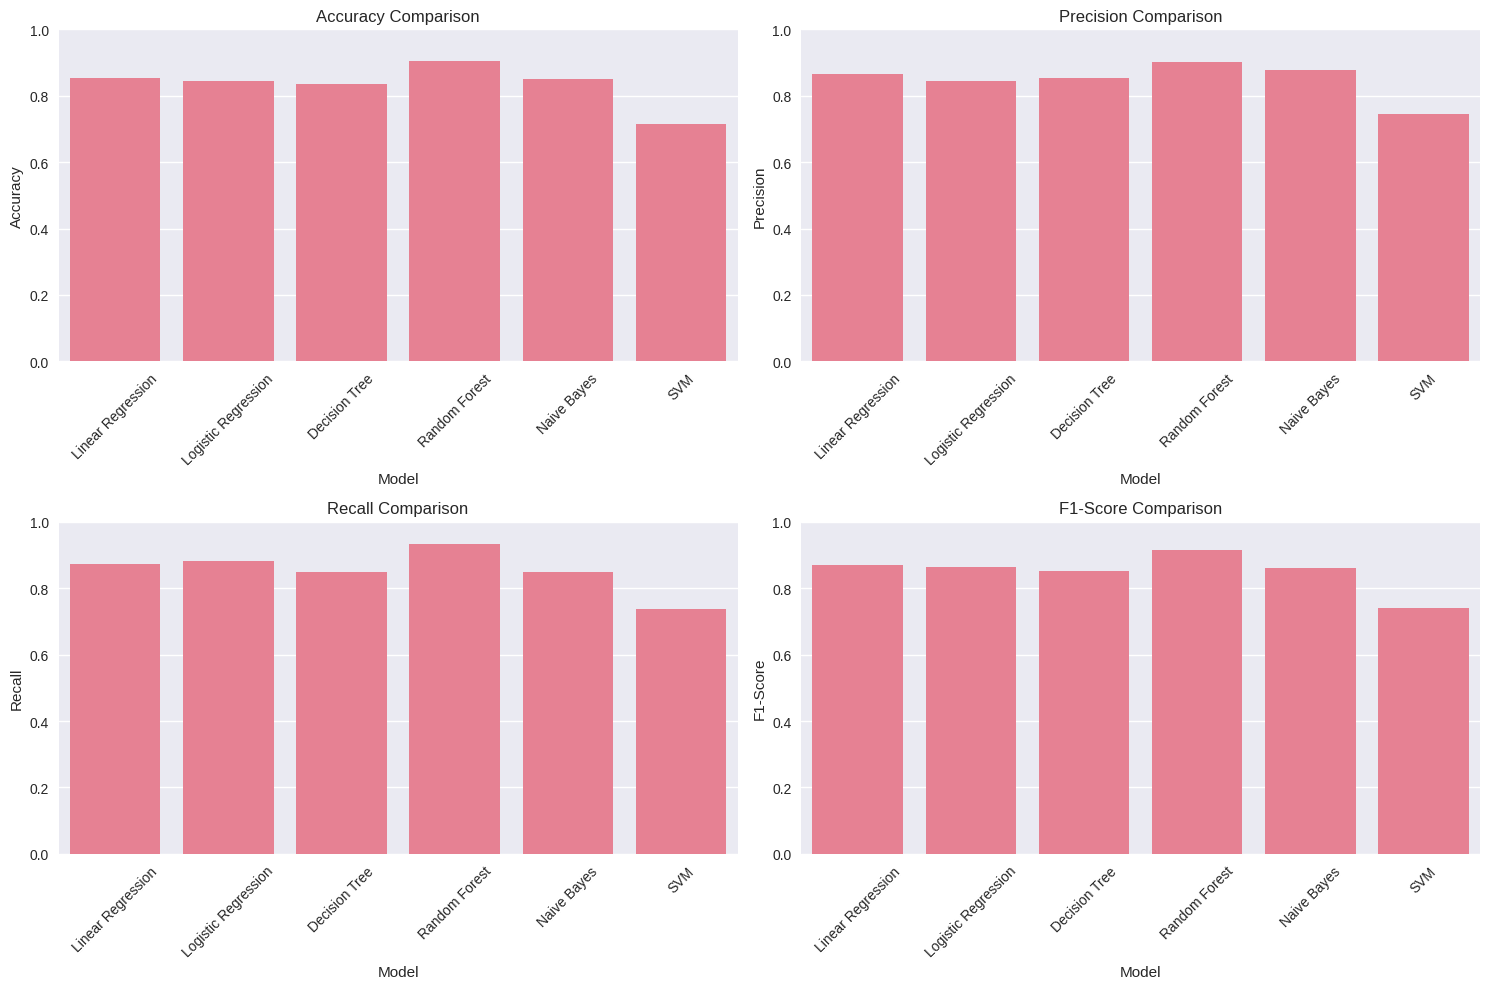

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2

    sns.barplot(data=comparison_df, x='Model', y=metric, ax=axes[row, col])
    axes[row, col].set_title(f'{metric} Comparison')
    axes[row, col].tick_params(axis='x', rotation=45)
    axes[row, col].set_ylim(0, 1)

plt.tight_layout()
plt.show()

### Model Performance Visualization - Combined

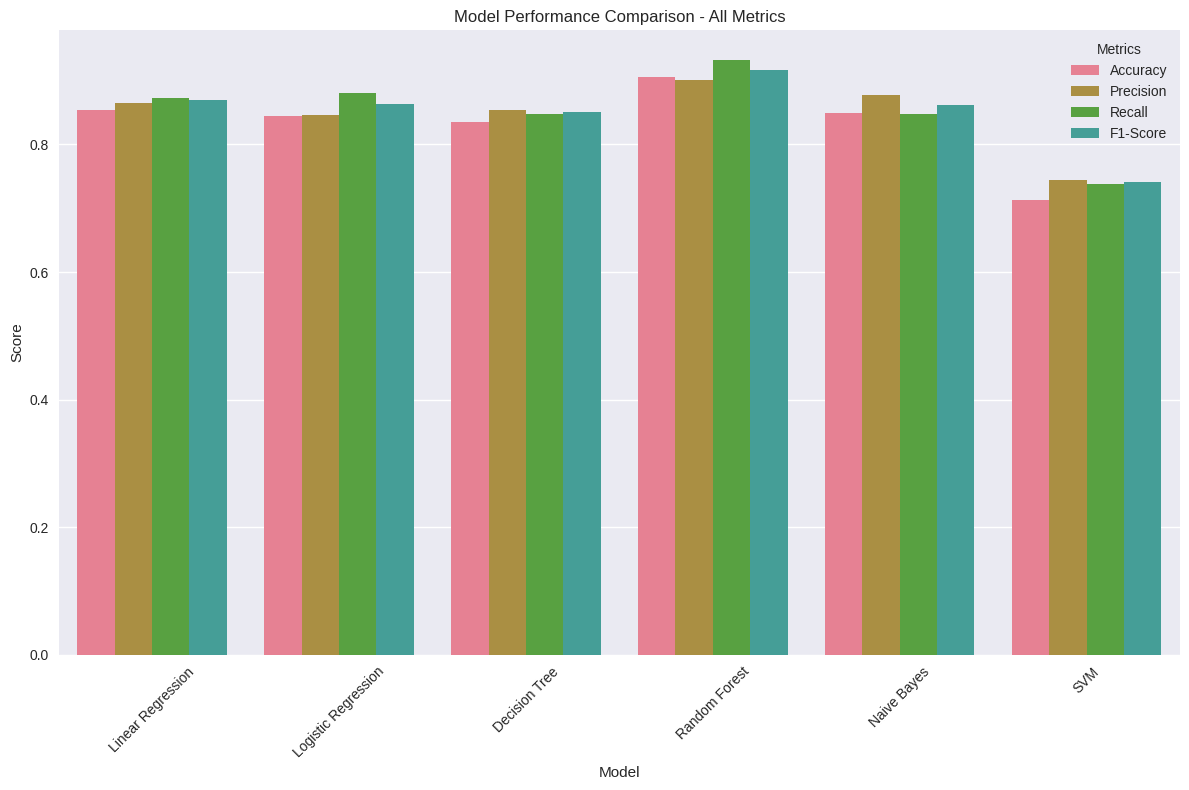

In [29]:
plt.figure(figsize=(12, 8))
comparison_melted = comparison_df.melt(id_vars=['Model'],
                                     value_vars=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
                                     var_name='Metric', value_name='Score')
sns.barplot(data=comparison_melted, x='Model', y='Score', hue='Metric')
plt.title('Model Performance Comparison - All Metrics')
plt.xticks(rotation=45)
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()


### Confusion Matrices Visualization

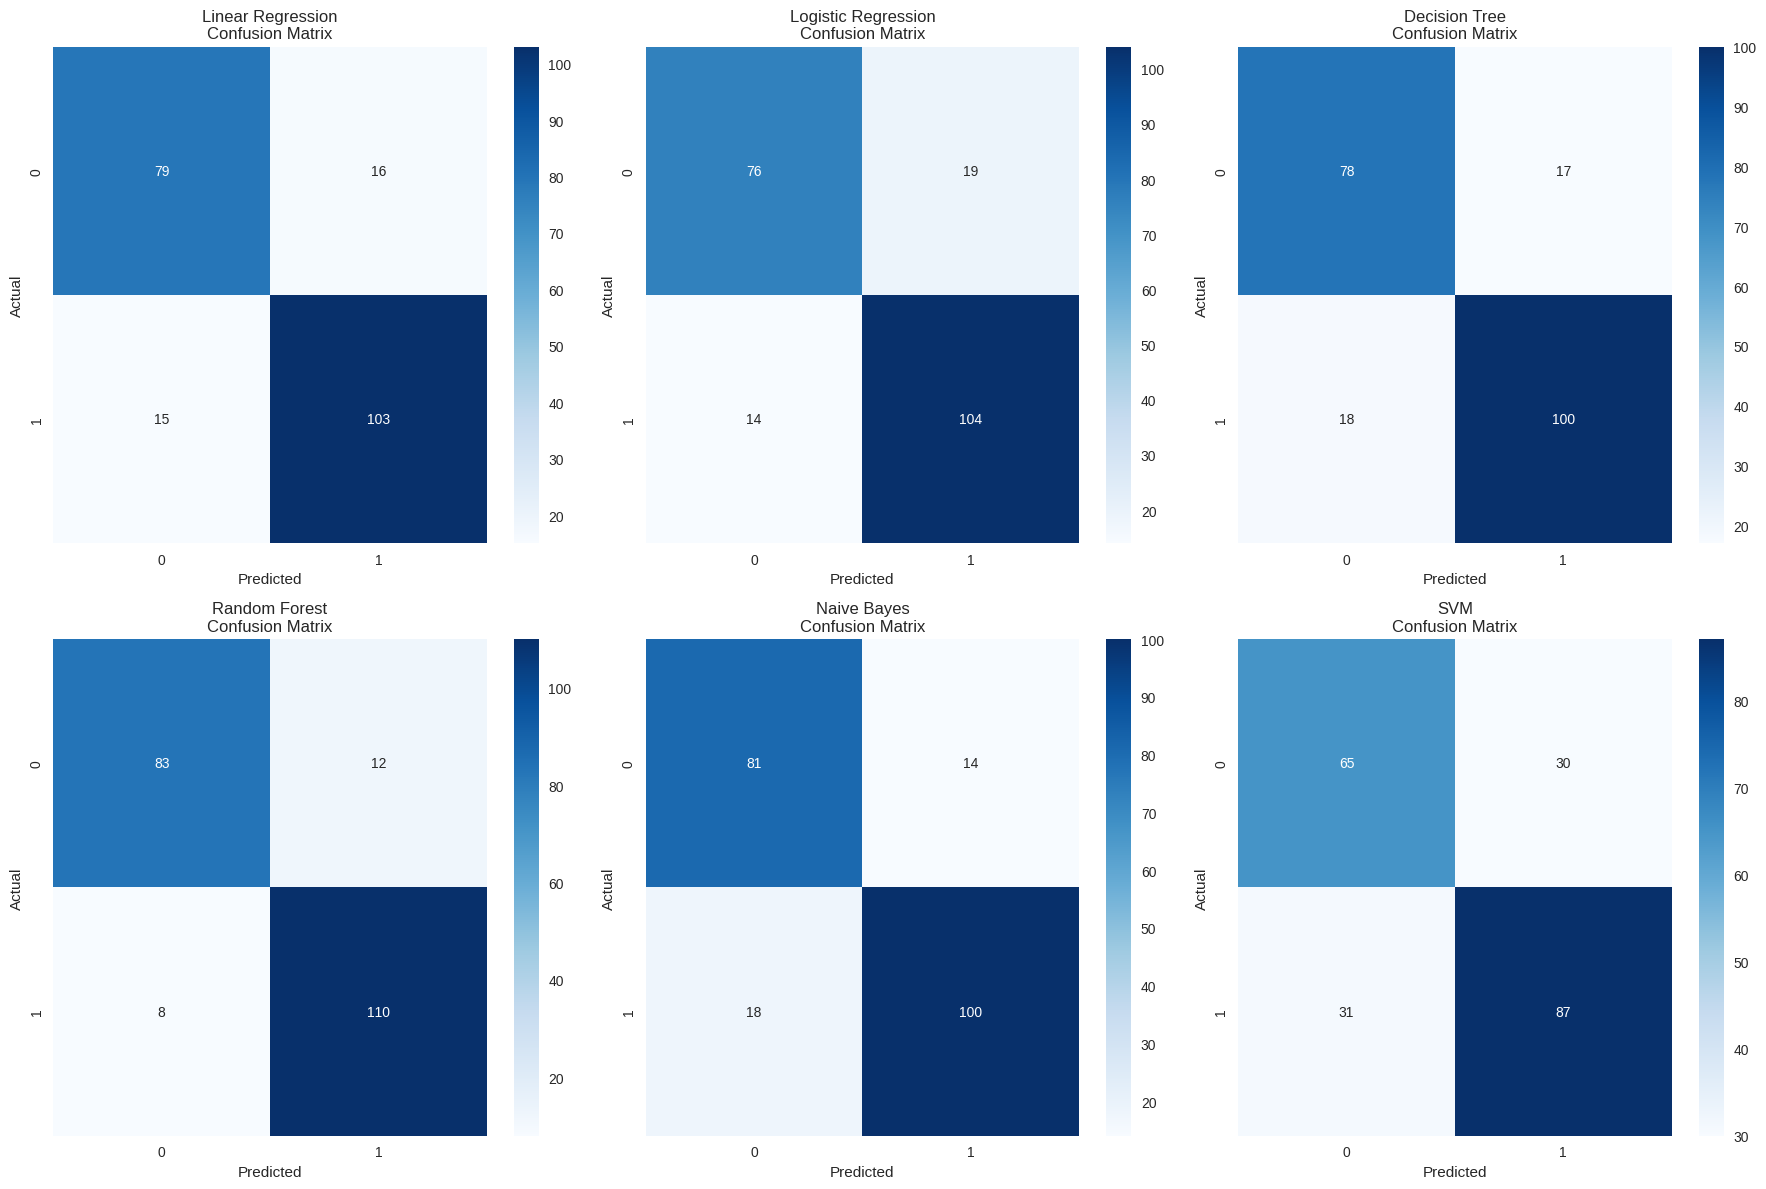

In [30]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
model_names = list(results.keys())

for i, name in enumerate(model_names):
    row = i // 3
    col = i % 3

    cm = confusion_matrix(y_test, results[name]['Predictions'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[row, col])
    axes[row, col].set_title(f'{name}\nConfusion Matrix')
    axes[row, col].set_xlabel('Predicted')
    axes[row, col].set_ylabel('Actual')

plt.tight_layout()
plt.show()


### Best Model Identification and Analysis

In [31]:
# Find the best model based on F1-score
best_model_name = max(results.keys(), key=lambda x: results[x]['F1-Score'])
best_model = results[best_model_name]

print(f"{'='*60}")
print(f"BEST PERFORMING MODEL: {best_model_name}")
print(f"{'='*60}")
print(f"Accuracy: {best_model['Accuracy']:.4f}")
print(f"Precision: {best_model['Precision']:.4f}")
print(f"Recall: {best_model['Recall']:.4f}")
print(f"F1-Score: {best_model['F1-Score']:.4f}")

# Detailed classification report for the best model
print(f"\nDetailed Classification Report for {best_model_name}:")
print(classification_report(y_test, best_model['Predictions']))

BEST PERFORMING MODEL: Random Forest
Accuracy: 0.9061
Precision: 0.9016
Recall: 0.9322
F1-Score: 0.9167

Detailed Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89        95
           1       0.90      0.93      0.92       118

    accuracy                           0.91       213
   macro avg       0.91      0.90      0.90       213
weighted avg       0.91      0.91      0.91       213



### Feature Importance Analysis

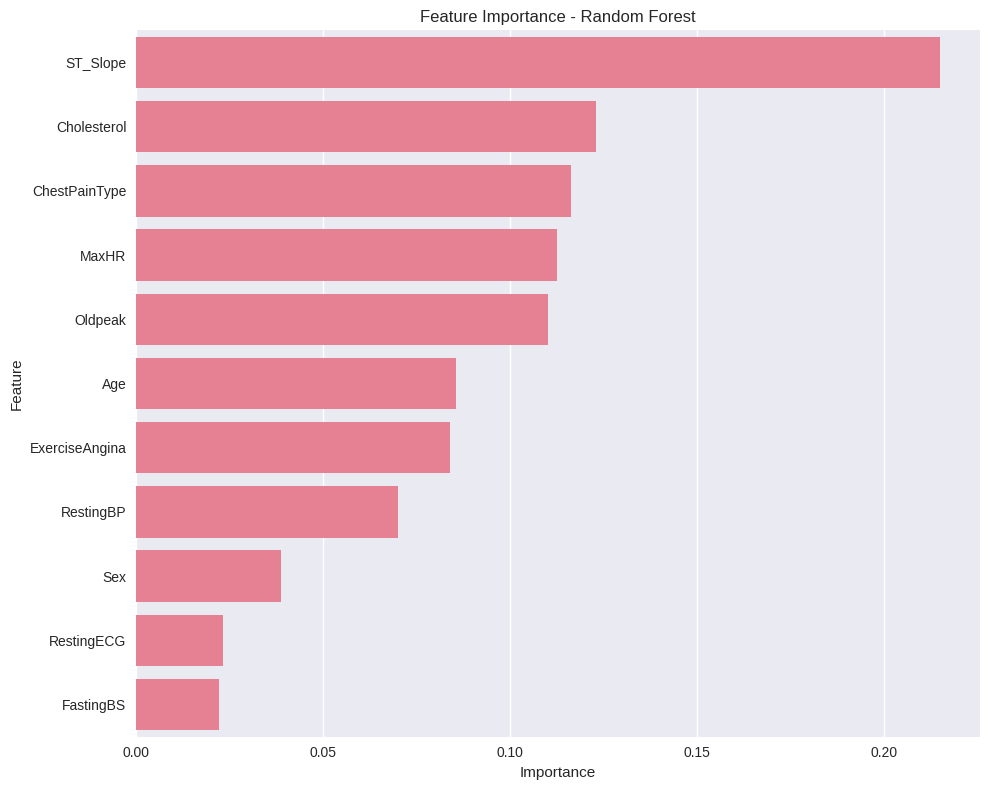

Feature Importance Rankings for Random Forest:
           Feature  Importance
10        ST_Slope    0.214820
4      Cholesterol    0.122808
2    ChestPainType    0.116356
7            MaxHR    0.112512
9          Oldpeak    0.110011
0              Age    0.085533
8   ExerciseAngina    0.083857
3        RestingBP    0.070059
1              Sex    0.038717
6       RestingECG    0.023144
5        FastingBS    0.022182


In [32]:
if hasattr(best_model['Model'], 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': best_model['Model'].feature_importances_
    }).sort_values('Importance', ascending=False)

    plt.figure(figsize=(10, 8))
    sns.barplot(data=feature_importance, x='Importance', y='Feature')
    plt.title(f'Feature Importance - {best_model_name}')
    plt.tight_layout()
    plt.show()

    print(f"Feature Importance Rankings for {best_model_name}:")
    print(feature_importance)
else:
    print(f"Feature importance not available for {best_model_name}")

### Model Rankings and Summary

In [33]:
print(f"{'='*60}")
print("FINAL ANALYSIS SUMMARY")
print(f"{'='*60}")

print(f"\n1. DATASET OVERVIEW:")
print(f"   - Total samples: {df.shape[0]}")
print(f"   - Features: {df.shape[1]-1}")
print(f"   - Target distribution: {dict(df['HeartDisease'].value_counts())}")

print(f"\n2. BEST PERFORMING MODEL:")
print(f"   - Model: {best_model_name}")
print(f"   - F1-Score: {best_model['F1-Score']:.4f}")
print(f"   - Accuracy: {best_model['Accuracy']:.4f}")

print(f"\n3. MODEL RANKINGS (by F1-Score):")
sorted_models = sorted(results.items(), key=lambda x: x[1]['F1-Score'], reverse=True)
for i, (name, metrics) in enumerate(sorted_models, 1):
    print(f"   {i}. {name}: {metrics['F1-Score']:.4f}")

FINAL ANALYSIS SUMMARY

1. DATASET OVERVIEW:
   - Total samples: 1061
   - Features: 11
   - Target distribution: {1: np.int64(589), 0: np.int64(472)}

2. BEST PERFORMING MODEL:
   - Model: Random Forest
   - F1-Score: 0.9167
   - Accuracy: 0.9061

3. MODEL RANKINGS (by F1-Score):
   1. Random Forest: 0.9167
   2. Linear Regression: 0.8692
   3. Logistic Regression: 0.8631
   4. Naive Bayes: 0.8621
   5. Decision Tree: 0.8511
   6. SVM: 0.7404


### Save Models and Results

In [35]:
import pickle
import os

# Create a directory for saved models
if not os.path.exists('saved_models'):
    os.makedirs('saved_models')
    print("Created 'saved_models' directory")

# Save all trained models
print("Saving all trained models...")
for model_name, model_data in results.items():
    # Clean model name for filename
    clean_name = model_name.lower().replace(' ', '_').replace('-', '_')
    filename = f'saved_models/{clean_name}_model.pkl'

    # Save model using pickle
    with open(filename, 'wb') as f:
        pickle.dump(model_data['Model'], f)
    print(f"✓ {model_name} saved as '{filename}'")

# Save label encoders
print("\nSaving label encoders...")
with open('saved_models/label_encoders.pkl', 'wb') as f:
    pickle.dump(label_encoders, f)
print("✓ Label encoders saved as 'saved_models/label_encoders.pkl'")

# Save feature names
print("\nSaving feature information...")
feature_info = {
    'feature_names': X.columns.tolist(),
    'categorical_columns': categorical_columns,
    'target_name': 'HeartDisease'
}
with open('saved_models/feature_info.pkl', 'wb') as f:
    pickle.dump(feature_info, f)
print("✓ Feature information saved as 'saved_models/feature_info.pkl'")

# Save model performance results
print("\nSaving model performance results...")
performance_results = {}
for model_name, model_data in results.items():
    performance_results[model_name] = {
        'Accuracy': model_data['Accuracy'],
        'Precision': model_data['Precision'],
        'Recall': model_data['Recall'],
        'F1-Score': model_data['F1-Score']
    }

with open('saved_models/model_performance.pkl', 'wb') as f:
    pickle.dump(performance_results, f)
print("✓ Model performance results saved as 'saved_models/model_performance.pkl'")

# Save results to CSV as well
comparison_df.to_csv('saved_models/model_comparison_results.csv', index=False)
print("✓ Model comparison CSV saved as 'saved_models/model_comparison_results.csv'")

# Save the best model information
best_model_info = {
    'best_model_name': best_model_name,
    'best_model_metrics': {
        'Accuracy': best_model['Accuracy'],
        'Precision': best_model['Precision'],
        'Recall': best_model['Recall'],
        'F1-Score': best_model['F1-Score']
    }
}
with open('saved_models/best_model_info.pkl', 'wb') as f:
    pickle.dump(best_model_info, f)
print("✓ Best model information saved as 'saved_models/best_model_info.pkl'")

print(f"\n{'='*60}")
print("ALL MODELS AND DATA SUCCESSFULLY SAVED!")
print(f"{'='*60}")
print(f"Best model: {best_model_name}")
print(f"All files saved in 'saved_models/' directory")

Created 'saved_models' directory
Saving all trained models...
✓ Linear Regression saved as 'saved_models/linear_regression_model.pkl'
✓ Logistic Regression saved as 'saved_models/logistic_regression_model.pkl'
✓ Decision Tree saved as 'saved_models/decision_tree_model.pkl'
✓ Random Forest saved as 'saved_models/random_forest_model.pkl'
✓ Naive Bayes saved as 'saved_models/naive_bayes_model.pkl'
✓ SVM saved as 'saved_models/svm_model.pkl'

Saving label encoders...
✓ Label encoders saved as 'saved_models/label_encoders.pkl'

Saving feature information...
✓ Feature information saved as 'saved_models/feature_info.pkl'

Saving model performance results...
✓ Model performance results saved as 'saved_models/model_performance.pkl'
✓ Model comparison CSV saved as 'saved_models/model_comparison_results.csv'
✓ Best model information saved as 'saved_models/best_model_info.pkl'

ALL MODELS AND DATA SUCCESSFULLY SAVED!
Best model: Random Forest
All files saved in 'saved_models/' directory


### Model Loading Example

In [38]:
print(f"\n{'='*60}")
print("EXAMPLE: HOW TO LOAD AND USE SAVED MODELS")
print(f"{'='*60}")

import pickle
import pandas as pd
import numpy as np

# Load the best model
with open('saved_models/best_model_info.pkl', 'rb') as f:
    best_info = pickle.load(f)

best_model_name = best_info['best_model_name']
clean_name = best_model_name.lower().replace(' ', '_').replace('-', '_')

# Load the actual model
with open(f'saved_models/{clean_name}_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Load label encoders
with open('saved_models/label_encoders.pkl', 'rb') as f:
    loaded_encoders = pickle.load(f)

# Load feature information
with open('saved_models/feature_info.pkl', 'rb') as f:
    feature_info = pickle.load(f)

print(f"Loaded best model: {best_model_name}")
print(f"Feature names: {feature_info['feature_names']}")

# Example prediction on new data
new_data = pd.DataFrame({
    'Age': [45],
    'Sex': ['M'],
    'ChestPainType': ['ATA'],
    'RestingBP': [120],
    'Cholesterol': [200],
    'FastingBS': [0],
    'RestingECG': ['Normal'],
    'MaxHR': [150],
    'ExerciseAngina': ['N'],
    'Oldpeak': [1.0],
    'ST_Slope': ['Up']
})

# Encode categorical variables
for column in feature_info['categorical_columns']:
    new_data[column] = loaded_encoders[column].transform(new_data[column])

# Make prediction
prediction = loaded_model.predict(new_data)
print(f"Prediction: {prediction[0]} (0=No Heart Disease, 1=Heart Disease)")



EXAMPLE: HOW TO LOAD AND USE SAVED MODELS
Loaded best model: Random Forest
Feature names: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']
Prediction: 0 (0=No Heart Disease, 1=Heart Disease)


### Key Insights and Recommendations

In [34]:
print(f"\n4. KEY INSIGHTS:")
print(f"   - Models generally performed well with F1-scores ranging from {min([results[m]['F1-Score'] for m in results]):.3f} to {max([results[m]['F1-Score'] for m in results]):.3f}")
print(f"   - {best_model_name} achieved the best balance of precision and recall")
print(f"   - The dataset appears to be well-suited for classification tasks")

# Count how many models achieved F1 > 0.8
high_performing = sum(1 for model in results.values() if model['F1-Score'] > 0.8)
print(f"   - {high_performing} out of {len(results)} models achieved F1-Score > 0.8")

print(f"\n5. RECOMMENDATIONS:")
print(f"   - Use {best_model_name} for production deployment")
print(f"   - Consider ensemble methods combining top performers")
print(f"   - Implement cross-validation for more robust evaluation")
print(f"   - Monitor model performance with new data")
print(f"   - Consider hyperparameter tuning for further optimization")


4. KEY INSIGHTS:
   - Models generally performed well with F1-scores ranging from 0.740 to 0.917
   - Random Forest achieved the best balance of precision and recall
   - The dataset appears to be well-suited for classification tasks
   - 5 out of 6 models achieved F1-Score > 0.8

5. RECOMMENDATIONS:
   - Use Random Forest for production deployment
   - Consider ensemble methods combining top performers
   - Implement cross-validation for more robust evaluation
   - Monitor model performance with new data
   - Consider hyperparameter tuning for further optimization
